**Import python packages that we will use for analysis**

When we import a package as something else, that is creating a shortcut for us to easily call the package. For example, import pandas as pd will allow us to type pd when calling a pandas function rather than pandas. 

In [1]:
import pandas as pd
import seaborn as sns

# Let's us import sparse matrices
import scipy.io
import scipy.sparse
import csv


#from lets us import only a part of that package rather than the entire thing. 
#We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

#In order for plots to appear in the notebook we need this:
%matplotlib inline

**Define the directory where the data is located**

We are going to store this directory as a variable data_dir.

In [2]:
data_dir = "/oasis/tscc/scratch/cshl_2018/dropseqtools_results_macosko/downsampled_100M/"
#Take a look at the string stored in the data_dir variable
data_dir

'/oasis/tscc/scratch/cshl_2018/dropseqtools_results_macosko/downsampled_100M/'

We are going to use the read_csv function to load in the data. When you call a function, initiate it with a parenthesis and then include all your arguments inside that parenthesis. Here, we need to give the filename and set the index as the first column. Shift tab tab inside of the parenthesis will bring up the help manual for the function.

In [3]:
#Store the dataframe with the name raw_counts
raw_counts = pd.read_table(data_dir+"13_out_gene_exon_tagged.dge.txt", index_col=0)

#Print the size of the dataframe (number of rows and columns)
print(raw_counts.shape)

#look at the first 5 rows
raw_counts.head()

(18615, 13000)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Load CellRangerResults as a Dataframe**

Since a counts matrix can be very big, CellRanger stores their data in a sparse matrix format with three files: ```matrix.mtx```, ```genes.tsv```, and ```barcodes.tsv```. This cannot be read in with pandas, so we will use the function written below.

In [4]:
def read_mtx_as_dataframe(mtx_file, columns_file, rows_file):
    """
    Reads a mtx file and returns a pandas dataframe.
    
    :param mtx_file: sparse matrix
    :param columns_file: tab-separated file containing column names
    :param rows_file: tab-separated file containing row names
    
    :return df: Pandas.DataFrame()
    """
    mat = scipy.io.mmread(mtx_file)
    columns = [
        row[0] for row in csv.reader(open(columns_file), delimiter="\t")
    ]
    rows = [
        row[0] for row in csv.reader(open(rows_file), delimiter="\t")
    ]
    df = pd.DataFrame(mat.todense(), columns=columns, index=rows)
    return df

In [5]:
cellranger_output = "/oasis/tscc/scratch/cshl_2018/cellranger_results_haber/"\
                    "Atlas1_batch1/outs/filtered_gene_bc_matrices/mm10/"


mtx = cellranger_output+"matrix.mtx"
genes = cellranger_output+"genes.tsv"
barcodes = cellranger_output+"barcodes.tsv"

haber_counts = read_mtx_as_dataframe(mtx_file=mtx, columns_file=barcodes, rows_file=genes)
haber_counts.head()

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000089699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000109048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Select genes for analysis**

There is A LOT of dropout in single cell data. Current rough estimates are that only ~10% of the transcriptome is acutally measured in each single cell. Therefore, it is important to only keep the genes for analysis that were detected in enough cells for us to gain meaningful information about them. A commonly used cutoff is to keep genes that were detected with at lest 1 UMI count in 10% of cells. Let's subset this dataframe for only those genes.

In [6]:
# Is the UMI count greater than 0 (at least 1). 
# I am going to wrap thisthis function in head to make it easy to view the result

(raw_counts > 0).head()

,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007N19Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610007P14Rik,True,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
0610008F07Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610009B14Rik,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Notice the result is a True/False (boolean) of whether or not the condition was satisfied. We are going to use .sum to count the number of True values in each row. The number of true values for each gene will tell us how many cells had a count of > 0 for that gene. 

In [7]:
#Axis = 1 calculates the sum across the rows (genes) instead of columns (cells)
#Again, using head to only look at the first 5 results. 

(raw_counts > 0).sum(axis=1).head()

GENE
0610005C13Rik      7
0610007N19Rik     40
0610007P14Rik    504
0610008F07Rik      1
0610009B14Rik      6
dtype: int64

We are interested in genes that were detected in at least 10% of cells. So we need genes where the sum that we just calculated is at least 10% of the total number of cells we have. First lets get the number corresponding to 10% of the cells.

In [8]:
#all the cell IDs are stored in the columns of our dataframe, 
#so we can get the total number of cells by finding the length of the columns

num_cells = len(raw_counts.columns)
0.1*num_cells

1300.0

In [9]:
#now ask how many of those genes have a sum greater than 0.1% times the number of cells

((raw_counts > 0).sum(axis=1) > 0.1*num_cells).head()

GENE
0610005C13Rik    False
0610007N19Rik    False
0610007P14Rik    False
0610008F07Rik    False
0610009B14Rik    False
dtype: bool

In [10]:
#We are going to store this boolean result as the variable genes_to_keep:

genes_to_keep = (raw_counts > 0).sum(axis=1) > 0.1*num_cells
genes_to_keep.head()

GENE
0610005C13Rik    False
0610007N19Rik    False
0610007P14Rik    False
0610008F07Rik    False
0610009B14Rik    False
dtype: bool

Now subset the dataframe to only keep genes that have the True value. 

In [11]:
counts_filtered = raw_counts.loc[genes_to_keep]

#How many genes are we left with?
print(counts_filtered.shape)
counts_filtered.head()

(603, 13000)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
1700020I14Rik,4,5,2,5,9,2,3,1,4,0,...,0,2,0,0,0,0,0,0,0,0
1810009A15Rik,2,2,2,0,18,1,0,1,11,1,...,0,0,0,0,0,0,0,0,0,0
2010107E04Rik,24,16,9,18,6,8,6,11,7,4,...,0,0,0,0,0,0,0,0,0,0
2610034M16Rik,0,0,0,0,2,0,0,0,5,0,...,0,0,0,0,0,1,0,0,0,0
2700089E24Rik,7,8,7,7,3,7,10,4,3,5,...,0,0,0,0,0,0,0,0,0,0


**How many UMIs are detected per cell?**

In this dataframe, the number of UMIs detected is the sum of the columns. Remember we summed the rows before. How do you get the column sums? Change the axis level!

In [12]:
counts_filtered.sum(axis=0).head()

CTTGTGCGGGAA    6479
GGCCGCAGTCCG    6509
GATTGGGAGGCA    3821
GCGCAACTGCTC    4889
AGTCAAGCCCTC    5714
dtype: int64

Let's make a histogram of these counts so we can see how many UMIs are expressed in all of our cells.

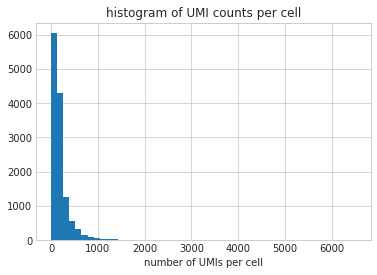

In [13]:
#make the background color white (default is grey)
sns.set_style("whitegrid")

#Histogram of the sums we calculated above. Increase the number of bins for higher resolution.
#What happens if you use different bin sizes? Try it out!
plt.hist(counts_filtered.sum(axis=0), bins=50)

#Give the plot an xlabel and a title
plt.xlabel("number of UMIs per cell")
plt.title('histogram of UMI counts per cell')

#This will prevent any text from being printed out other than your plot. 
#Sometimes these functions automatically print a lot of things that are annoying.
plt.show()

Do these counts look reasonable? Are there any cells that we should filter out? We can also display this as a boxplot. Or a voilinplot. Check out the code below.

(0, 2000)

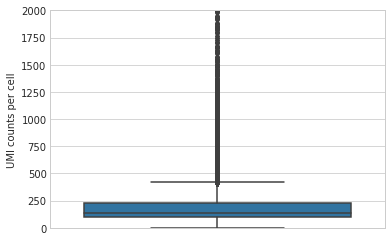

In [15]:
g = sns.boxplot(counts_filtered.sum(axis=0), orient='v')
g.set_ylabel("UMI counts per cell")
g.set_ylim([0,2000])

(0, 1000)

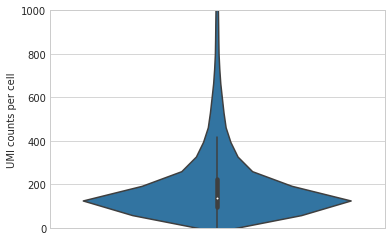

In [16]:
g = sns.violinplot(counts_filtered.sum(axis=0), orient='v')
g.set_ylabel("UMI counts per cell")
g.set_ylim([0,1000])

In [27]:
cell_barcode_counts = pd.DataFrame(counts_filtered.sum())
cell_barcode_counts.rename(columns = {0:'count'}, inplace=True)
cell_barcode_counts.head()

,count
CTTGTGCGGGAA,6479
GGCCGCAGTCCG,6509
GATTGGGAGGCA,3821
GCGCAACTGCTC,4889
AGTCAAGCCCTC,5714


In [29]:
cell_barcode_counts = cell_barcode_counts.sort_values(by='count', ascending=False)

In [35]:
cell_barcodes_to_keep = list(cell_barcode_counts.head(2500).index)

In [36]:
counts_filtered_final = counts_filtered[cell_barcodes_to_keep]
print(counts_filtered_final.shape)

(603, 2500)


**Exercise**

Make a histogram, boxplot, and violoinplot for the total counts measured for each gene (instead of cells). What do you notice? 

**Save Filtered DataFrame**

Let's save this new matrix as counts_filtered so we can load it in later for downstream analyses. We will use the pandas function to_csv

In [38]:
# Here I created a new folder inside the macosko_batch1_downsampled folder called processed_files. 
# If it doesn't yet exist, I can make it in jupyter by calling the BASH command with a !
# And calling the save_dir variable in bash syntax with a $variable_name
save_dir = "/home/ucsd-train25/scratch/projects/macosko_batch1_downsampled/processed_files/"
!mkdir -p $save_dir

counts_filtered_final.to_csv(save_dir+"counts_filtered.csv")